## Exploratory Data Analysis
>This notebook shows some basic Exploratory Data Analysis about the dataset

### Objectives
0. Clean data
1. Which book is the most popular?
2. Which author is the most popular?
3. Which number wrote the biggest number of books?
4. Is number of pages correlated with ratings or number of reviews?
5. Which years had the biggest number of books written?
6. Is there tendency to reduce number of pages in nowaday books?

In [32]:
books_df = books_df.rename({'Count of text reviews': 'CountOfTextReviews'})
books_df['CountOfTextReviews'].describe()

statistic,value
str,f64
"""min""",0.0
"""max""",43652.0
"""null_count""",1.440462e6
"""mean""",7.172849
"""std""",124.840352
"""count""",1.850149e6


#### Language

In [33]:
books_df['Language'].unique()

Language
str
"""yid"""
"""tgl"""
"""nl"""
"""elx"""
"""grc"""
"""aze"""
"""epo"""
"""zul"""
"""ada"""


- These eng, en-US, en-CA, en-GB are all English

- Replace 'nl' with 'nld' (Dutch language)

- '--' and 'nan' needs investigating

In [34]:
books_df = books_df.with_columns(books_df['Language'].str.replace('en-US', 'eng')
                                                    .str.replace('en-GB', 'eng')
                                                    .str.replace('en-CA', 'eng')
                                                    .str.replace('nl', 'nld')
                                )

In [35]:
books_df.with_row_count().filter(books_df['Language'] == '--')

row_nr,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,CountOfTextReviews,PagesNumber
u32,i64,str,str,str,f64,i32,i8,i8,str,i32,i32,i32,i32,i32,i32,i64,str,i64,str,i64,i64
76743,2130696,"""Montes de Oca""","""Benito Pérez G…","""8420650285""",3.48,1978,6,30,"""Alianza""",2,14,9,4,0,29,1,"""--""",null,"""El gran friso …",null,164
87395,2053807,"""Aita Tettauen""","""Benito Pérez G…","""8420650366""",3.75,1979,6,30,"""Alianza""",6,12,8,1,1,28,1,"""--""",null,"""El gran friso …",null,208
87554,2130683,"""Carlos VI en l…","""Benito Pérez G…","""8420650374""",3.89,1979,6,30,"""Alianza : Hern…",6,6,4,2,0,18,1,"""--""",null,null,null,187
140767,2098073,"""The Persona in…","""Martin M. Wink…","""3487074370""",4.0,1983,1,1,"""Olms""",0,1,0,0,0,1,0,"""--""",null,null,null,248
266642,211273,"""The Dinosaur H…","""Robert T. Bakk…","""0140100555""",4.19,1988,1,1,"""Zebra""",932,710,317,75,23,2057,2,"""--""",480,null,null,null
605100,2383967,"""Fama o bicikli…","""Svetislav Basa…","""8681283715""",4.04,1996,1,1,"""Dereta""",239,219,114,33,11,616,8,"""--""",null,"""""След като изл…",null,284
936683,4105709,"""Woodland Anima…","""Patricia Walsh…","""1575723522""",4.25,2000,11,22,"""Heinemann Educ…",2,1,1,0,0,4,1,"""--""",null,"""Aspiring artis…",null,32
1039528,806815,"""Did You Say Tw…","""Maureen Child""","""0373764081""",3.35,2001,23,11,"""Silhouette Des…",16,19,32,15,3,85,7,"""--""",192,"""Top-secret mil…",7,null
1245235,3354455,"""Marcel Van Eed…","""Institut für m…","""3936711097""",4.5,2003,7,4,"""Verlag für mod…",1,1,0,0,0,2,0,"""--""",null,"""Niederländisch…",null,224


In [36]:
books_df[[140767, 266642, 936683, 1039528, 1778888], 'Language'] = 'eng'
books_df[1831058, 'Language'] = 'null'
books_df[[76743, 87395, 87554], 'Language'] = 'spa'
books_df[605100, 'Language'] = 'srp'
books_df[1245235, 'Language'] = 'ger'
books_df[1442947, 'Language'] = 'cat'
books_df[1696459, 'Language'] = 'swe'

In [37]:
books_df['Language'].value_counts().sort('counts', descending=True)

Language,counts
str,u32
null,1598375
"""eng""",209643
"""fre""",16321
"""ger""",11467
"""spa""",7247
"""jpn""",2059
"""ita""",1156
"""mul""",417
"""por""",406


Text(0, 0.5, 'Language')

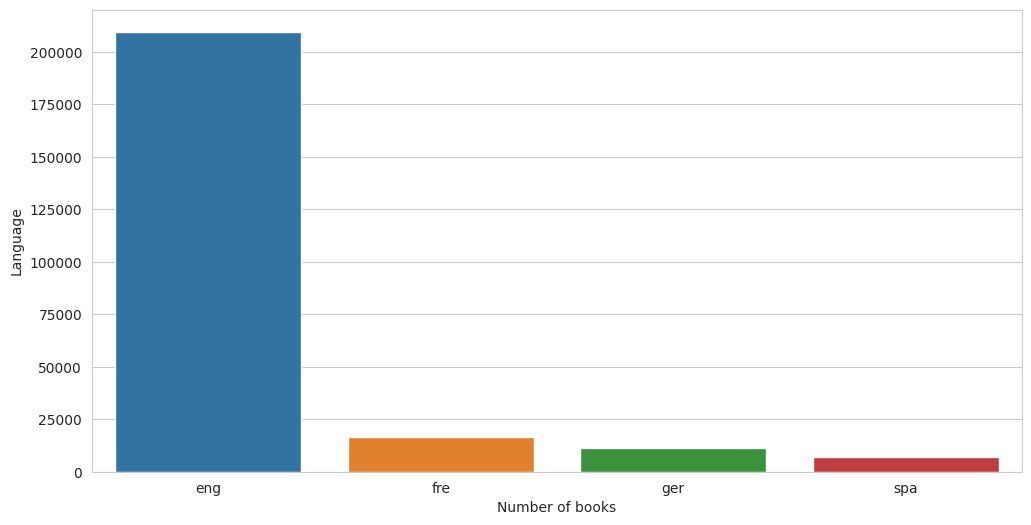

In [38]:
plt.figure(figsize = (12,6))
langs = sns.barplot(
    x = books_df['Language'].value_counts().sort('counts', descending=True).head(5)['Language'].to_pandas(),
    y = books_df['Language'].value_counts().sort('counts', descending=True).head(5)['counts'].to_pandas()
)
langs.set_xlabel('Number of books')
langs.set_ylabel('Language')

#### Pages Number

In [39]:
books_df = books_df.with_columns(books_df['PagesNumber'].fill_null(books_df['pagesNumber']))
books_df['PagesNumber'].null_count()

0

In [40]:
books_df['PagesNumber'].describe()

statistic,value
str,f64
"""min""",0.0
"""max""",4.517845e6
"""null_count""",0.0
"""mean""",276.552045
"""std""",5006.23687
"""count""",1.850149e6


And drop column 'pagesNumber'

In [41]:
books_df = books_df.drop(columns=['pagesNumber'])
books_df.schema

{'Id': Int64,
 'Name': Utf8,
 'Authors': Utf8,
 'ISBN': Utf8,
 'Rating': Float64,
 'PublishYear': Int32,
 'PublishMonth': Int8,
 'PublishDay': Int8,
 'Publisher': Utf8,
 'RatingDist5': Int32,
 'RatingDist4': Int32,
 'RatingDist3': Int32,
 'RatingDist2': Int32,
 'RatingDist1': Int32,
 'RatingDistTotal': Int32,
 'CountsOfReview': Int64,
 'Language': Utf8,
 'Description': Utf8,
 'CountOfTextReviews': Int64,
 'PagesNumber': Int64}

It was expected that the average number of pages is between 200-300 pages (mean - 176, median - 239). However it seems strange for books with million number of pages

In [42]:
books_df.filter(books_df['PagesNumber'] > 100_000)

Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,Description,CountOfTextReviews,PagesNumber
i64,str,str,str,f64,i32,i8,i8,str,i32,i32,i32,i32,i32,i32,i64,str,str,i64,i64
179017,"""Sholokhov's Ti…","""A.B. Murphy""","""0704417707""",5.0,1997,31,12,"""Department of …",3,0,0,0,0,3,0,null,null,null,2254246
2538668,"""Another 425 H…","""Sandy Redburn""","""0969941064""",0.0,1999,5,6,"""Crafty Secrets…",0,0,0,0,0,0,0,null,null,null,4517845
1634966,"""425 Heartwarmi…","""Sandy Redburn""","""0969941048""",0.0,1999,25,4,"""Crafty Secrets…",0,0,0,0,0,0,0,null,"""This first boo…",0,4517845
3199266,"""Internet Sacre…","""John B. Hare""","""0970939043""",4.5,2004,9,1,"""Sacred-texts.c…",1,1,0,0,0,2,0,null,null,null,500000
1870280,"""2006 Essential…","""Progressive Ma…","""1422004694""",0.0,2006,1,15,"""Progressive Ma…",0,0,0,0,0,0,0,"""eng""","""This unique el…",null,107490
163162,"""2006 Iran Nucl…","""Progressive Ma…","""1422004805""",0.0,2006,15,1,"""Progressive Ma…",0,0,0,0,0,0,0,null,null,null,205141


To avoid such a big ourliers let's remove these books with more than 100,000 pages

In [43]:
books_df = books_df.sort('PagesNumber')
n = books_df.filter(books_df['PagesNumber'] > 100_000).shape[0]
n

6

In [44]:
books_df = books_df[:len(books_df)-n]
books_df.tail()

Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,Description,CountOfTextReviews,PagesNumber
i64,str,str,str,f64,i32,i8,i8,str,i32,i32,i32,i32,i32,i32,i64,str,str,i64,i64
163161,"""2006 Iranian N…","""U.S. Governmen…","""1422005003""",0.0,2006,17,1,"""Progressive Ma…",0,0,0,0,0,0,0,"""eng""",null,null,63987
4538171,"""Gourmet's Menu…","""Gourmet Magazi…","""0394540328""",5.0,1984,10,12,"""Knopf""",5,0,0,0,0,5,0,null,null,null,65224
733737,"""Lisa and David…","""Theodore Isaac…","""0345331079""",3.65,1973,12,3,"""Ballantine Boo…",28,53,42,13,3,139,0,null,"""Two stories ab…",0,80300
907355,"""Lifelines""","""Edith Schaeffe…","""034531154X""",3.78,1983,12,12,"""Ballantine Boo…",3,8,7,0,0,18,0,null,"""The Ten Comman…",0,80500
3247146,"""Scholar's Libr…","""Logos Research…","""1577990773""",0.0,2001,10,1,"""Logos Research…",0,0,0,0,0,0,0,"""eng""","""Scholar's Libr…",null,100000


#### Description

In [45]:
books_df['Description'].n_unique()

1083670

There are a lot of missing values in this column, but in general this is just text. Let's find out how to fill them soon

### Eploratory Data Analysis

Consider these questions:
1. Which book is the most popular?
2. Which author is the most popular?
3. Which number wrote the biggest number of books?
4. Is number of pages correlated with ratings or number of reviews?
5. Which years had the biggest number of books written?
6. Is there tendency to reduce number of pages in nowaday books?

In [46]:
books_df.schema

{'Id': Int64,
 'Name': Utf8,
 'Authors': Utf8,
 'ISBN': Utf8,
 'Rating': Float64,
 'PublishYear': Int32,
 'PublishMonth': Int8,
 'PublishDay': Int8,
 'Publisher': Utf8,
 'RatingDist5': Int32,
 'RatingDist4': Int32,
 'RatingDist3': Int32,
 'RatingDist2': Int32,
 'RatingDist1': Int32,
 'RatingDistTotal': Int32,
 'CountsOfReview': Int64,
 'Language': Utf8,
 'Description': Utf8,
 'CountOfTextReviews': Int64,
 'PagesNumber': Int64}

#### 1. Which book is the most popular?

In [47]:
# The book with biggest number of ratings (total)
books_df.filter(books_df['RatingDistTotal'] == books_df['RatingDistTotal'].max())

Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,Description,CountOfTextReviews,PagesNumber
i64,str,str,str,f64,i32,i8,i8,str,i32,i32,i32,i32,i32,i32,i64,str,str,i64,i64
4593339,"""Ο Χάρι Πότερ κ…","""J.K. Rowling""",null,4.47,1998,11,1,"""Εκδόσεις Ψυχογ…",4608992,1621963,603633,140565,119534,7094687,51,"""gre""","""<i>Alternate c…",null,360
